In [11]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


%matplotlib inline

# Importing Data

In [12]:
data = pd.read_csv('Total dataset file.csv')

In [13]:
data.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [14]:
data.columns

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts'],
      dtype='object')

In [15]:
data.drop(['Unnamed: 0','HomeTeam', 'AwayTeam', 'Date', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',
           'HTGS', 'ATGS', 'HTGC', 'ATGC','DiffPts','HTFormPts','ATFormPts',
           'HM4','HM5','AM4','AM5','HTLossStreak5','ATLossStreak5','HTWinStreak5','ATWinStreak5',
           'HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3'],1, inplace=True)

In [16]:
data.tail()

,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts
6835,H,1.078947,1.842105,L,L,L,D,W,W,-0.289474,0.710526,-0.263158
6836,NH,0.947368,2.552632,W,D,W,W,D,W,-0.473684,2.052632,-0.131579
6837,NH,0.868421,0.789474,L,L,L,L,D,D,-0.710526,-0.894737,-0.052632
6838,H,1.947368,1.236842,W,L,W,W,L,L,0.973684,-0.078947,0.078947
6839,H,1.026316,1.289474,D,W,L,D,W,W,-0.578947,-0.315789,-0.105263


> FTR -> Full Time Result
>
> HTP -> Home Team Point
>
> ATP -> Away Team Points
>
> HMn -> Home Team Match no. Result
>
> AMn -> Away Team Match no. Result
>
> HTGD -> Difference between scoered and recievved goals for home team
>
> ATGD -> ifference between scoered and recievved goals for away team
>
> DiffFromPts -> Difference between HTP and ATP

In [17]:
matches = data.shape[0]
feats = data.shape[1]

hWins = len(data[data.FTR == 'H'])

win_rate = (float(hWins) / (matches)) * 100

# Print the results
print ("Total number of matches: {}".format(matches))
print ("Number of features: {}".format(feats))
print ("Number of matches won by home team: {}".format(hWins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 6840
Number of features: 12
Number of matches won by home team: 3176
Win rate of home team: 46.43%


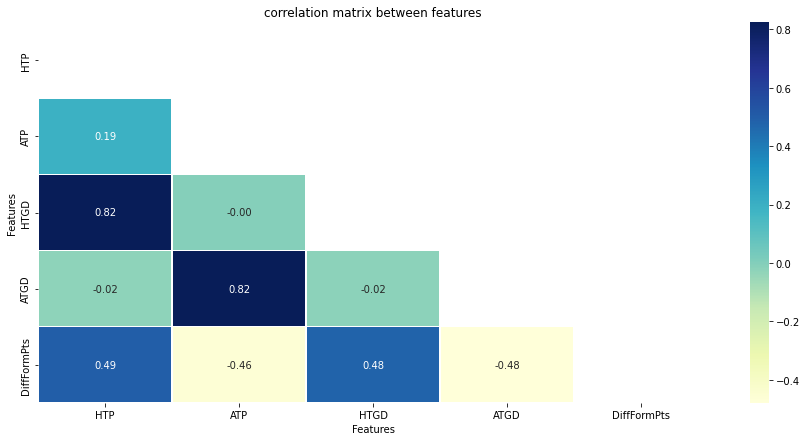

In [18]:
corr_matrix = data.corr();

mask = np.zeros_like(corr_matrix);
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.heatmap(corr_matrix, mask=mask,annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.3);

plt.title('correlation matrix between features');
plt.xlabel('Features');
plt.ylabel('Features');


<Figure size 1152x648 with 0 Axes>

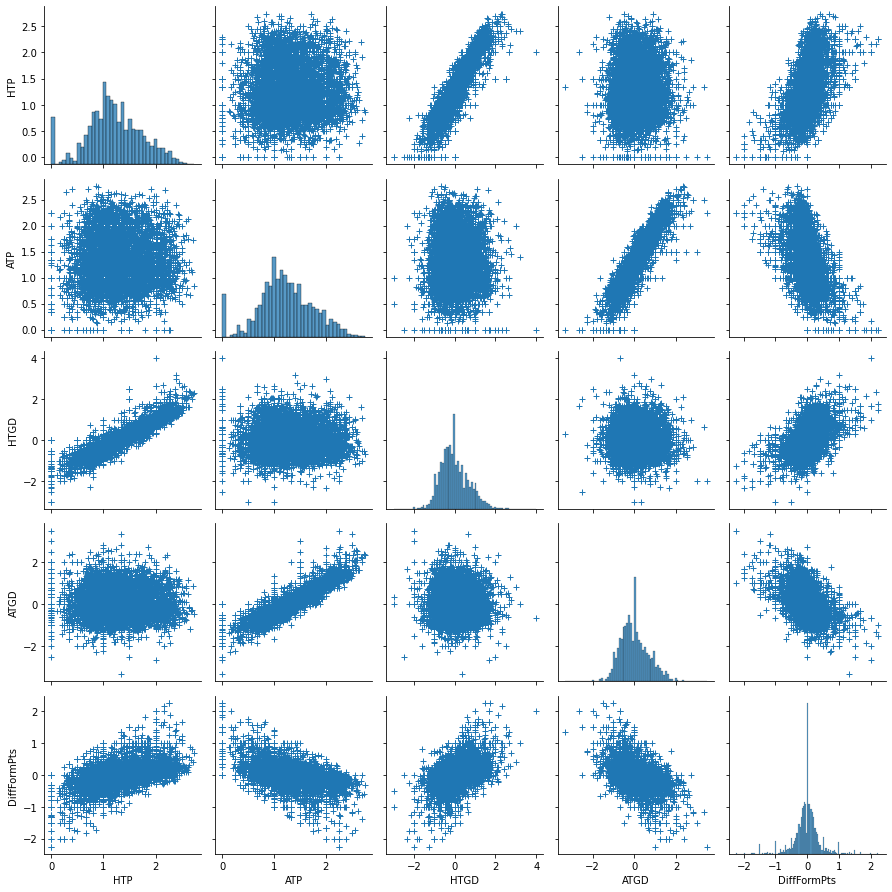

In [15]:
plt.figure(figsize=(16,9));

sns.pairplot(data,plot_kws=dict(marker="+", linewidth=1));
plt.tight_layout();
plt.show();

# Model

In [19]:
# Separate into feature set and target variable
X_all = data.drop(['FTR'],1)
y_all = data['FTR']

# normalising the data.
cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])

> ## Change Data 

In [20]:
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)

In [22]:
 #Hyper-parameter tuning FOR DecisionTree
model_params = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [2,3,4,5,6,7,8,9,10]
        }   
    }
}



In [23]:
 scores = []
from sklearn.model_selection import GridSearchCV

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,KNN,0.603976,{'n_neighbors': 9}


In [7]:
def clf_train(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''

    clf.fit(X_train, y_train)

    
def clf_predict(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''

    y_pred = clf.predict(features)
    
    
    return f1_score(target, y_pred, pos_label='H'), sum(target == y_pred) / float(len(y_pred))


def do_all(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    clf_train(clf, X_train, y_train)
    
    f1, acc = clf_predict(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = clf_predict(clf, X_test, y_test)

    
    clf.fit(X_train, y_train)




def do_all(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    clf_train(clf, X_train, y_train)
    
    f1, acc = clf_predict(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = clf_predict(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [24]:
clf_1 = LogisticRegression(random_state = 42)
clf_3 = KNeighborsClassifier(n_neighbors=9)
clf_4 = DecisionTreeClassifier(random_state=0)



In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
# SVM with different kernals 
svm_1 = SVC(C=10, kernel='linear')
svm_1.fit(X_train, y_train)
# Predict on Test data
preds = svm_1.predict(X_test)
# Calculate Model Accuracy
acc = accuracy_score(preds, y_test)
print(f"Model Accuracy = {round(acc*100,2)}%")

Model Accuracy = 62.0%


In [25]:
# # try poly kernal 
svm_2 = SVC(C=100, kernel='poly')
svm_2.fit(X_train, y_train)
# Predict on Test data
preds = svm_2.predict(X_test)
# Calculate Model Accuracy
acc = accuracy_score(preds, y_test)
print(f"Model Accuracy = {round(acc*100,2)}%")

Model Accuracy = 54.0%


In [27]:
# try Radial Basis Function Kernel with different c 
svm_3 = SVC(C=100, kernel='rbf')
svm_3.fit(X_train, y_train)
# Predict on Test data
preds = svm_3.predict(X_test)
# Calculate Model Accuracy
acc = accuracy_score(preds, y_test)
print(f"Model Accuracy = {round(acc*100,2)}%")

Model Accuracy = 66.0%


<Figure size 1152x648 with 0 Axes>

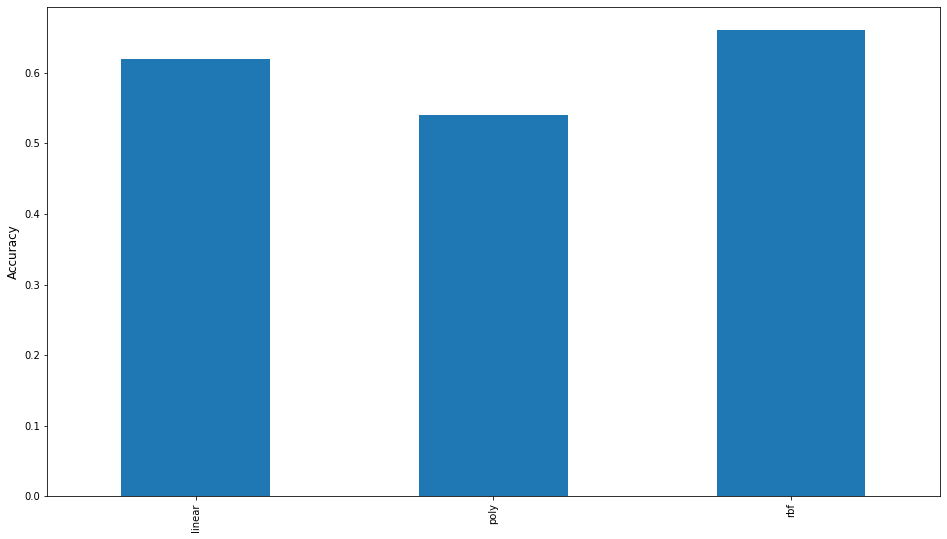

In [27]:
#comparing between SVM models with different kernals 
d = {'linear': [0.62], 'poly': [0.54], 'rbf': [0.66]}
df = pd.DataFrame(data=d)
df
plt.figure(figsize=(16,9))

df.T.plot(kind = 'bar', figsize=(16,9), legend = False);
plt.ylabel(r'Accuracy', size = 12);
plt.show();

In [30]:
do_all(svm_1,X_train, y_train, X_test, y_test)
print("*"*40)
do_all(svm_2,X_train, y_train, X_test, y_test)
print("*"*40)
do_all(svm_3,X_train, y_train, X_test, y_test)
print("*"*40)

Training a SVC using a training set size of 6790. . .
0.5860818511483337 0.6469808541973491
F1 score and accuracy score for training set: 0.5861 , 0.6470.
F1 score and accuracy score for test set: 0.5581 , 0.6200.
****************************************
Training a SVC using a training set size of 6790. . .
0.6802181457610312 0.7150220913107511
F1 score and accuracy score for training set: 0.6802 , 0.7150.
F1 score and accuracy score for test set: 0.4651 , 0.5400.
****************************************
Training a SVC using a training set size of 6790. . .
0.8278567925453654 0.844918998527246
F1 score and accuracy score for training set: 0.8279 , 0.8449.
F1 score and accuracy score for test set: 0.5405 , 0.6600.
****************************************


[0.618556701030928, 0.604418262150221, 0.5964653902798233, 0.590721649484536, 0.5861561119293077]


Text(0, 0.5, 'Cross-Validated Accuracy')

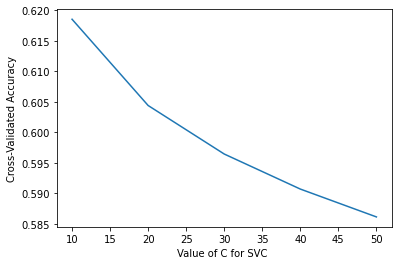

In [32]:
C_range=list(np.arange(10,60,10))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)   
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_range,acc_score)
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')


In [33]:
#final test  for svm
clf_2= SVC(C=10, kernel='rbf')

In [29]:
 #Hyper-parameter tuning FOR Random Forest
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [100,500,40,700,800]
        }
    },}

 scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.62592,{'n_estimators': 800}


In [30]:
# the RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier
clf_5 = RandomForestClassifier(criterion='gini', 
                             n_estimators=500,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)


In [34]:
do_all(clf_1,X_train, y_train, X_test, y_test)
print("*"*40)
do_all(clf_2, X_train, y_train, X_test, y_test)
print("*"*40)
do_all(clf_3, X_train, y_train, X_test, y_test)
print("*"*40)
do_all(clf_4, X_train, y_train, X_test, y_test)
print("*"*40)
do_all(clf_5, X_train, y_train, X_test, y_test)
print("*"*40)

Training a LogisticRegression using a training set size of 6790. . .
0.5939352871421312 0.6469808541973491
F1 score and accuracy score for training set: 0.5939 , 0.6470.
F1 score and accuracy score for test set: 0.5532 , 0.5800.
****************************************
Training a SVC using a training set size of 6790. . .
0.7154769846564376 0.7487481590574374
F1 score and accuracy score for training set: 0.7155 , 0.7487.
F1 score and accuracy score for test set: 0.5581 , 0.6200.
****************************************
Training a KNeighborsClassifier using a training set size of 6790. . .
0.6528911848025328 0.6932253313696612
F1 score and accuracy score for training set: 0.6529 , 0.6932.
F1 score and accuracy score for test set: 0.4783 , 0.5200.
****************************************
Training a DecisionTreeClassifier using a training set size of 6790. . .
0.9773929773929775 0.9792341678939617
F1 score and accuracy score for training set: 0.9774 , 0.9792.
F1 score and accuracy score f

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.9061889250814332 0.9151693667157584
F1 score and accuracy score for training set: 0.9062 , 0.9152.
F1 score and accuracy score for test set: 0.5128 , 0.6200.
****************************************


In [ ]:
d = {'LR': [0.58], 'SVM': [0.66], 'KNN': [0.52], 'Decision Tree': [0.62], 'RandomForest': [0.62]}
df = pd.DataFrame(data=d)
df

,LR,SVM,KNN,Decision Tree,RandomForest
0,0.58,0.66,0.52,0.62,0.62


<Figure size 1152x648 with 0 Axes>

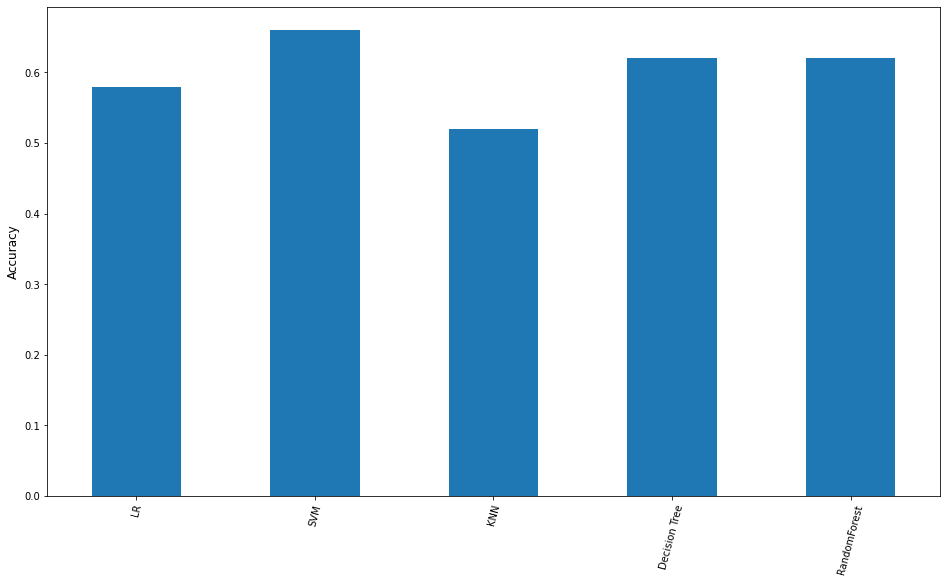

In [ ]:
plt.figure(figsize=(16,9))

df.T.plot(kind = 'bar', figsize=(16,9), legend = False);
plt.ylabel(r'Accuracy', size = 12);
plt.xticks(rotation=75);
plt.show();